# Task 4: Data Modeling

In [23]:
import os
print(os.getcwd())
import sys
sys.path.append(r'c:/Alpha_Predictive-Modeling/scripts')
from modeling import DataModeling

c:\Alpha_Predictive-Modeling\notebooks



Load Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Load Dataset

In [25]:
data = pd.read_csv("E:/10Academy/Data03/insurance_data.csv")

Initialize Modeler

In [26]:
modeler = DataModeling(data)
modeler.preprocess_data()

Consolidated Output for Classification and Regression


Decision Tree Confusion Matrix:
[[83 72]
 [67 78]]


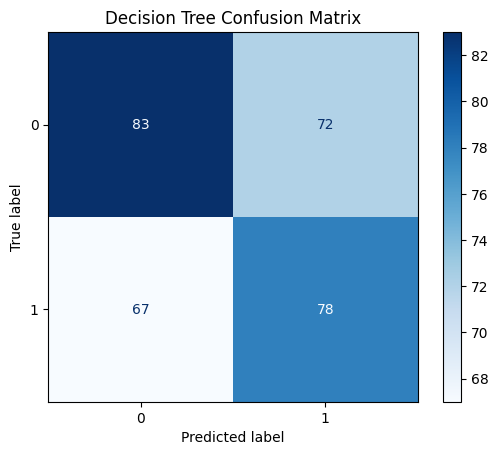


Random Forest Confusion Matrix:
[[87 68]
 [67 78]]


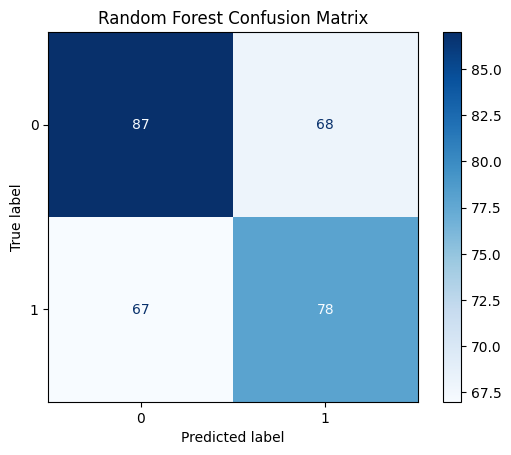


Logistic Regression Confusion Matrix:
[[71 84]
 [46 99]]


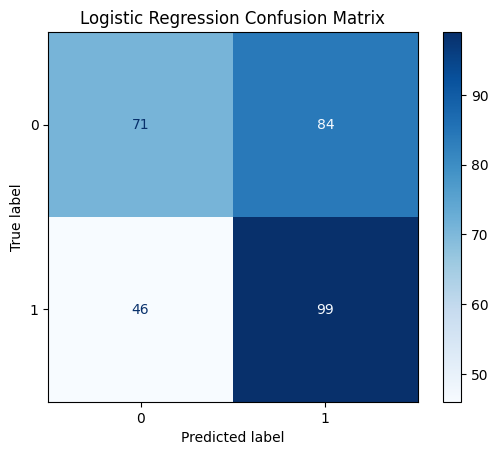


XGBoost Confusion Matrix:
[[81 74]
 [68 77]]


c:\Alpha_Predictive-Modeling\pmvenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:46:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


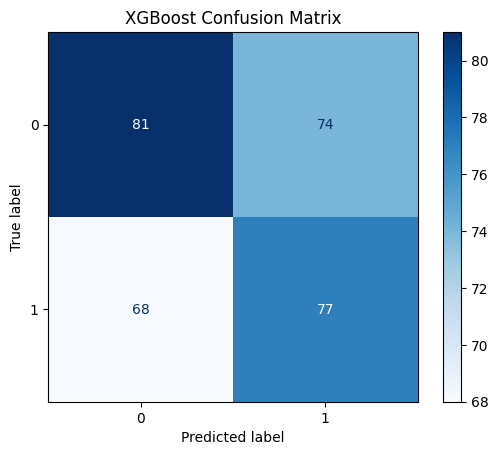

Decision Tree Metrics:
MAE: 628.2303, RMSE: 839.9817, R²: -1.2226
Random Forest Metrics:
MAE: 474.8507, RMSE: 632.3902, R²: -0.2597
XGBoost Metrics:
MAE: 524.8569, RMSE: 683.4321, R²: -0.4713


In [28]:
# Assuming 'modeler.classification()' and 'modeler.regression()' return dictionaries with all metrics
classification_results = modeler.classification()
regression_results = modeler.regression()

 Display results

In [29]:
print("# Consolidated Model Results")
print("{:<25} {:<15} {:<10}".format("Model", "Metric", "Value"))
print("-" * 50)
# Print Classification Results and Corresponding Regression Results
for model_name, metrics in classification_results.items():
    print(f"Classification: {model_name}")
    for metric, value in metrics.items():
        if metric == "Confusion Matrix":
            print(f"{' ' * 5}{metric}:")
            for row in value:
                print(f"{' ' * 10}{row}")
        else:
            print("{:<25} {:<15} {:<10.4f}".format(model_name, metric, value))
    
    # Add corresponding regression results for the same model
    if model_name in regression_results:
        reg_metrics = regression_results[model_name]
        print(f"{model_name} Regression Metrics:")
        print(f"MAE: {reg_metrics['MAE']:.4f}, RMSE: {reg_metrics['RMSE']:.4f}, R²: {reg_metrics['R2 Score']:.4f}")
    
    print("\n")

# Consolidated Model Results
Model                     Metric          Value     
--------------------------------------------------
Classification: Decision Tree
Decision Tree             Accuracy        0.5367    
Decision Tree             F1 Score        0.5288    
Decision Tree             Precision       0.5200    
Decision Tree             Recall          0.5379    
Decision Tree Regression Metrics:
MAE: 628.2303, RMSE: 839.9817, R²: -1.2226


Classification: Random Forest
Random Forest             Accuracy        0.5500    
Random Forest             F1 Score        0.5361    
Random Forest             Precision       0.5342    
Random Forest             Recall          0.5379    
Random Forest Regression Metrics:
MAE: 474.8507, RMSE: 632.3902, R²: -0.2597


Classification: Logistic Regression
Logistic Regression       Accuracy        0.5667    
Logistic Regression       F1 Score        0.6037    
Logistic Regression       Precision       0.5410    
Logistic Regression       Reca

Prepare data for Visualizations

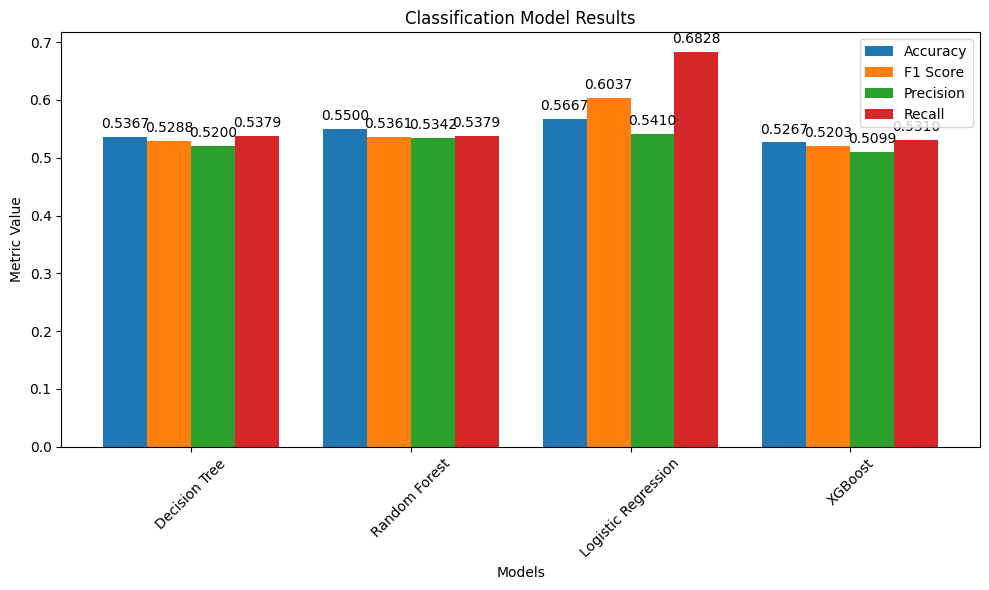

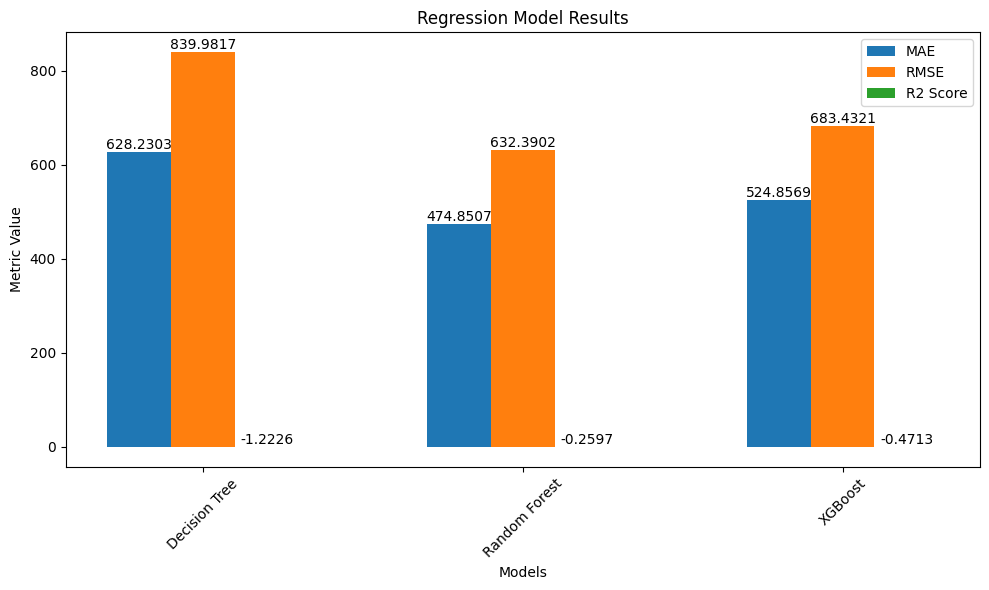

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Assume `classification_results` and `regression_results` are dictionaries as described

# Prepare data for visualization
def plot_model_metrics(metrics_dict, title, ylabel):
    models = []
    metrics = {}
    
    # Organize data
    for model_name, metric_values in metrics_dict.items():
        models.append(model_name)
        for metric, value in metric_values.items():
            if metric != "Confusion Matrix":  # Skip Confusion Matrix
                if metric not in metrics:
                    metrics[metric] = []
                metrics[metric].append(value)
    
    # Plot the bar chart
    x = np.arange(len(models))
    width = 0.2  # Width of the bars
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create bars for each metric
    for i, (metric, values) in enumerate(metrics.items()):
        bars = ax.bar(x + i * width, values, width, label=metric)
        
        # Annotate each bar with its value
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.4f}', 
                    ha='center', va='bottom', fontsize=10)
    
    # Add labels and title
    ax.set_xlabel("Models")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + width * (len(metrics) - 1) / 2)
    ax.set_xticklabels(models)
    ax.legend()
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot Classification Metrics
plot_model_metrics(
    classification_results, 
    title="Classification Model Results", 
    ylabel="Metric Value"
)

# Plot Regression Metrics
plot_model_metrics(
    regression_results, 
    title="Regression Model Results", 
    ylabel="Metric Value"
)